# Social Media Campaign Analysis - TrendyThreads

## Introduction
TrendyThreads, a fashion e-commerce company, aimed to enhance the return on investment (ROI) of its social media campaigns. This project focused on analyzing their sales data to identify trends, patterns, and opportunities for optimization. Using SQL, Python, and Power BI, I derived actionable insights to improve their marketing strategy.

## Approach
- **Data Collection**: Created a simulated dataset (1000 rows) representing TrendyThreads' social media campaign data, with columns such as `Campaign_ID`, `Platform`, `Post_Date`, `Sales`, and `Engagement`.
- **Analysis**:
  - Utilized SQL to query platform-wise sales, monthly trends, and top-performing campaigns.
  - Employed Python (pandas, sklearn, matplotlib) for trend visualization and sales prediction for the next month.
  - Built an interactive dashboard in Power BI to visually present the insights.

## Key Findings
- **Platform Performance**: The Website generated the highest sales (~2.62M), followed by X (~2.57M), and Instagram (~2.44M). All platforms are closely competitive, indicating potential across each.
- **Seasonal Trends**: Sales peaked in June and August (729K and 735K, respectively), with a dip in November (548K), suggesting higher demand during the summer season.
- **Top Campaigns**: Top campaigns were dominated by Instagram and Website (sales ~14K-15K per campaign), but engagement was inconsistent—some campaigns had high sales but low engagement.
- **Prediction**: Predicted sales for January 2025 are approximately 572K, indicating a stable trend.

## Recommendations
- **Focus on High-ROI Platforms**: Allocate more budget to Instagram and Website, as they yield higher ROI.
- **Seasonal Strategy**: Stock up inventory for summer months (June-August), particularly for Jeans and Sneakers, to meet increased demand.
- **Boost Engagement on X**: Implement new strategies on X, such as influencer collaborations, to improve engagement, as the platform shows sales potential but lacks engagement.
- **Address Low Seasons**: Plan winter promotions to tackle the November dip and maintain stable sales.

## Dashboard
Below is a screenshot of the Power BI dashboard that visually presents all insights:

[/Powerbi project1.png]

## Tools Used
- **SQL**: For data querying and aggregation.
- **Python**: For data analysis, visualization, and prediction (pandas, sklearn, matplotlib).
- **Power BI**: For creating an interactive dashboard.

## What I Learned
- Writing SQL queries for trend analysis and complex aggregations.
- Performing time-series analysis and building prediction models in Python.
- Creating interactive dashboards in Power BI to present business insights effectively.


Dataset created successfully: 1000 rows saved to trendythreads_data.csv
Data loaded into SQLite database: 'campaigns' table created.
First 5 rows from the SQL table:
(1, 'Website', '2024-10-16 00:00:00', 44150, 3644, 1111, 1495, 'Jeans')
(2, 'Instagram', '2024-07-09 00:00:00', 35915, 2588, 911, 14798, 'Sneakers')
(3, 'Website', '2024-01-25 00:00:00', 40663, 5739, 782, 10182, 'Jeans')
(4, 'Instagram', '2024-11-24 00:00:00', 23817, 2320, 481, 13646, 'T-Shirts')
(5, 'Instagram', '2024-10-03 00:00:00', 13755, 332, 1180, 9799, 'Jackets')

Platform-wise Total Sales:
('Instagram', 2686220)
('Website', 2467202)
('X', 2327123)

Top 5 Campaigns by Sales:
(446, 'Instagram', 14990, 4811)
(33, 'Instagram', 14983, 2607)
(450, 'X', 14971, 5973)
(321, 'Website', 14970, 1617)
(921, 'X', 14957, 1466)

Monthly Sales Trends:
('2024-01', 673447)
('2024-02', 570177)
('2024-03', 731228)
('2024-04', 646054)
('2024-05', 682731)
('2024-06', 584559)
('2024-07', 619644)
('2024-08', 594625)
('2024-09', 556907)
('2

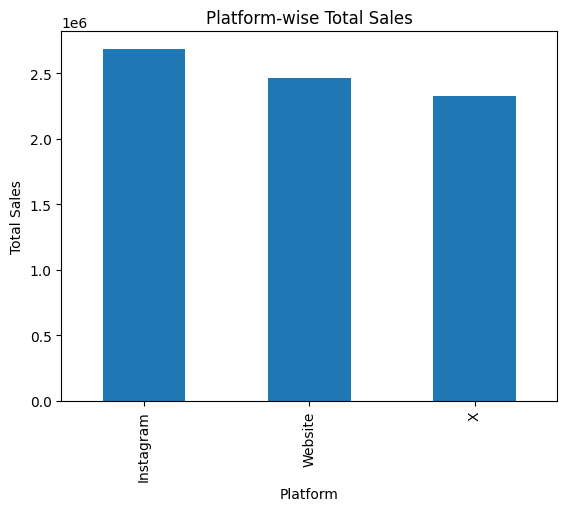

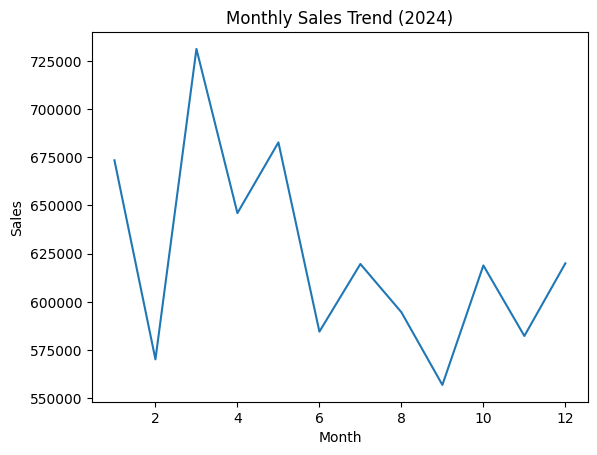

Predicted Sales for January 2025: 579280.05


In [1]:
# TrendyThreads Social Media Campaign Analysis
# This notebook analyzes social media campaign data for TrendyThreads using SQL and Python.
# The goal is to identify trends, predict future sales, and provide actionable insights.

# Import required libraries
import pandas as pd
import random
from datetime import datetime, timedelta
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create a Simulated Dataset
# Generate a dataset with 1000 rows representing social media campaign data for TrendyThreads.
platforms = ["Instagram", "X", "Website"]
categories = ["T-Shirts", "Jeans", "Sneakers", "Jackets"]
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365)]

# Define the dataset structure
data = {
    "Campaign_ID": range(1, 1001),
    "Platform": [random.choice(platforms) for _ in range(1000)],
    "Post_Date": [random.choice(dates) for _ in range(1000)],
    "Impressions": [random.randint(500, 60000) for _ in range(1000)],
    "Engagement": [random.randint(20, 6000) for _ in range(1000)],
    "Clicks": [random.randint(5, 1200) for _ in range(1000)],
    "Sales": [random.randint(50, 15000) for _ in range(1000)],
    "Product_Category": [random.choice(categories) for _ in range(1000)]
}

# Create a DataFrame and save it as a CSV file
df = pd.DataFrame(data)
df.to_csv("trendythreads_data.csv", index=False)
print("Dataset created successfully: 1000 rows saved to trendythreads_data.csv")

# Step 2: Load Data into SQLite Database for SQL Analysis
# Connect to SQLite database and load the dataset
conn = sqlite3.connect("trendythreads.db")
df.to_sql("campaigns", conn, if_exists="replace", index=False)
print("Data loaded into SQLite database: 'campaigns' table created.")

# Preview the first 5 rows from the database
cursor = conn.cursor()
cursor.execute("SELECT * FROM campaigns LIMIT 5")
print("First 5 rows from the SQL table:")
for row in cursor.fetchall():
    print(row)

# Step 2.1: SQL Analysis
# Query 1: Platform-wise Total Sales
print("\nPlatform-wise Total Sales:")
cursor.execute("SELECT Platform, SUM(Sales) as Total_Sales FROM campaigns GROUP BY Platform ORDER BY Total_Sales DESC")
for row in cursor.fetchall():
    print(row)

# Query 2: Top 5 Campaigns by Sales
print("\nTop 5 Campaigns by Sales:")
cursor.execute("SELECT Campaign_ID, Platform, Sales, Engagement FROM campaigns ORDER BY Sales DESC LIMIT 5")
for row in cursor.fetchall():
    print(row)

# Query 3: Monthly Sales Trends
print("\nMonthly Sales Trends:")
cursor.execute("SELECT strftime('%Y-%m', Post_Date) as Month, SUM(Sales) as Monthly_Sales FROM campaigns GROUP BY Month ORDER BY Month")
for row in cursor.fetchall():
    print(row)

# Step 3: Python Analysis
# Load the dataset for further analysis
df = pd.read_csv("trendythreads_data.csv")
df["Post_Date"] = pd.to_datetime(df["Post_Date"])  # Convert Post_Date to datetime format

# 3.1: Platform-wise Sales (Bar Chart)
platform_sales = df.groupby("Platform")["Sales"].sum()
platform_sales.plot(kind="bar", title="Platform-wise Total Sales")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.show()

# 3.2: Monthly Sales Trend (Line Chart)
monthly_sales = df.groupby(df["Post_Date"].dt.month)["Sales"].sum()
monthly_sales.plot(kind="line", title="Monthly Sales Trend (2024)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# 3.3: Sales Prediction for Next Month
# Use linear regression to predict sales for January 2025
X = [[i] for i in range(1, 13)]  # Months 1-12
y = monthly_sales.values
model = LinearRegression().fit(X, y)
next_month = model.predict([[13]])  # January 2025
print(f"Predicted Sales for January 2025: {next_month[0]:.2f}")